## Wine Quality Prediction

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 1. Data 불러오기

In [2]:
data=pd.read_csv("winequality-red.csv")

### 1-1. train set과 test set 분리

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target='quality'

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(data[features],data[target],shuffle=True)

In [9]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
195,7.8,0.590,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4
955,8.5,0.210,0.52,1.9,0.090,9.0,23.0,0.99648,3.36,0.67,10.4
776,6.9,0.765,0.18,2.4,0.243,5.5,48.0,0.99612,3.40,0.60,10.3
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
475,9.6,0.680,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2
...,...,...,...,...,...,...,...,...,...,...,...
1203,9.9,0.740,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4
1462,6.8,0.640,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4
1280,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1248,6.9,0.410,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1


## 2. Data EDA

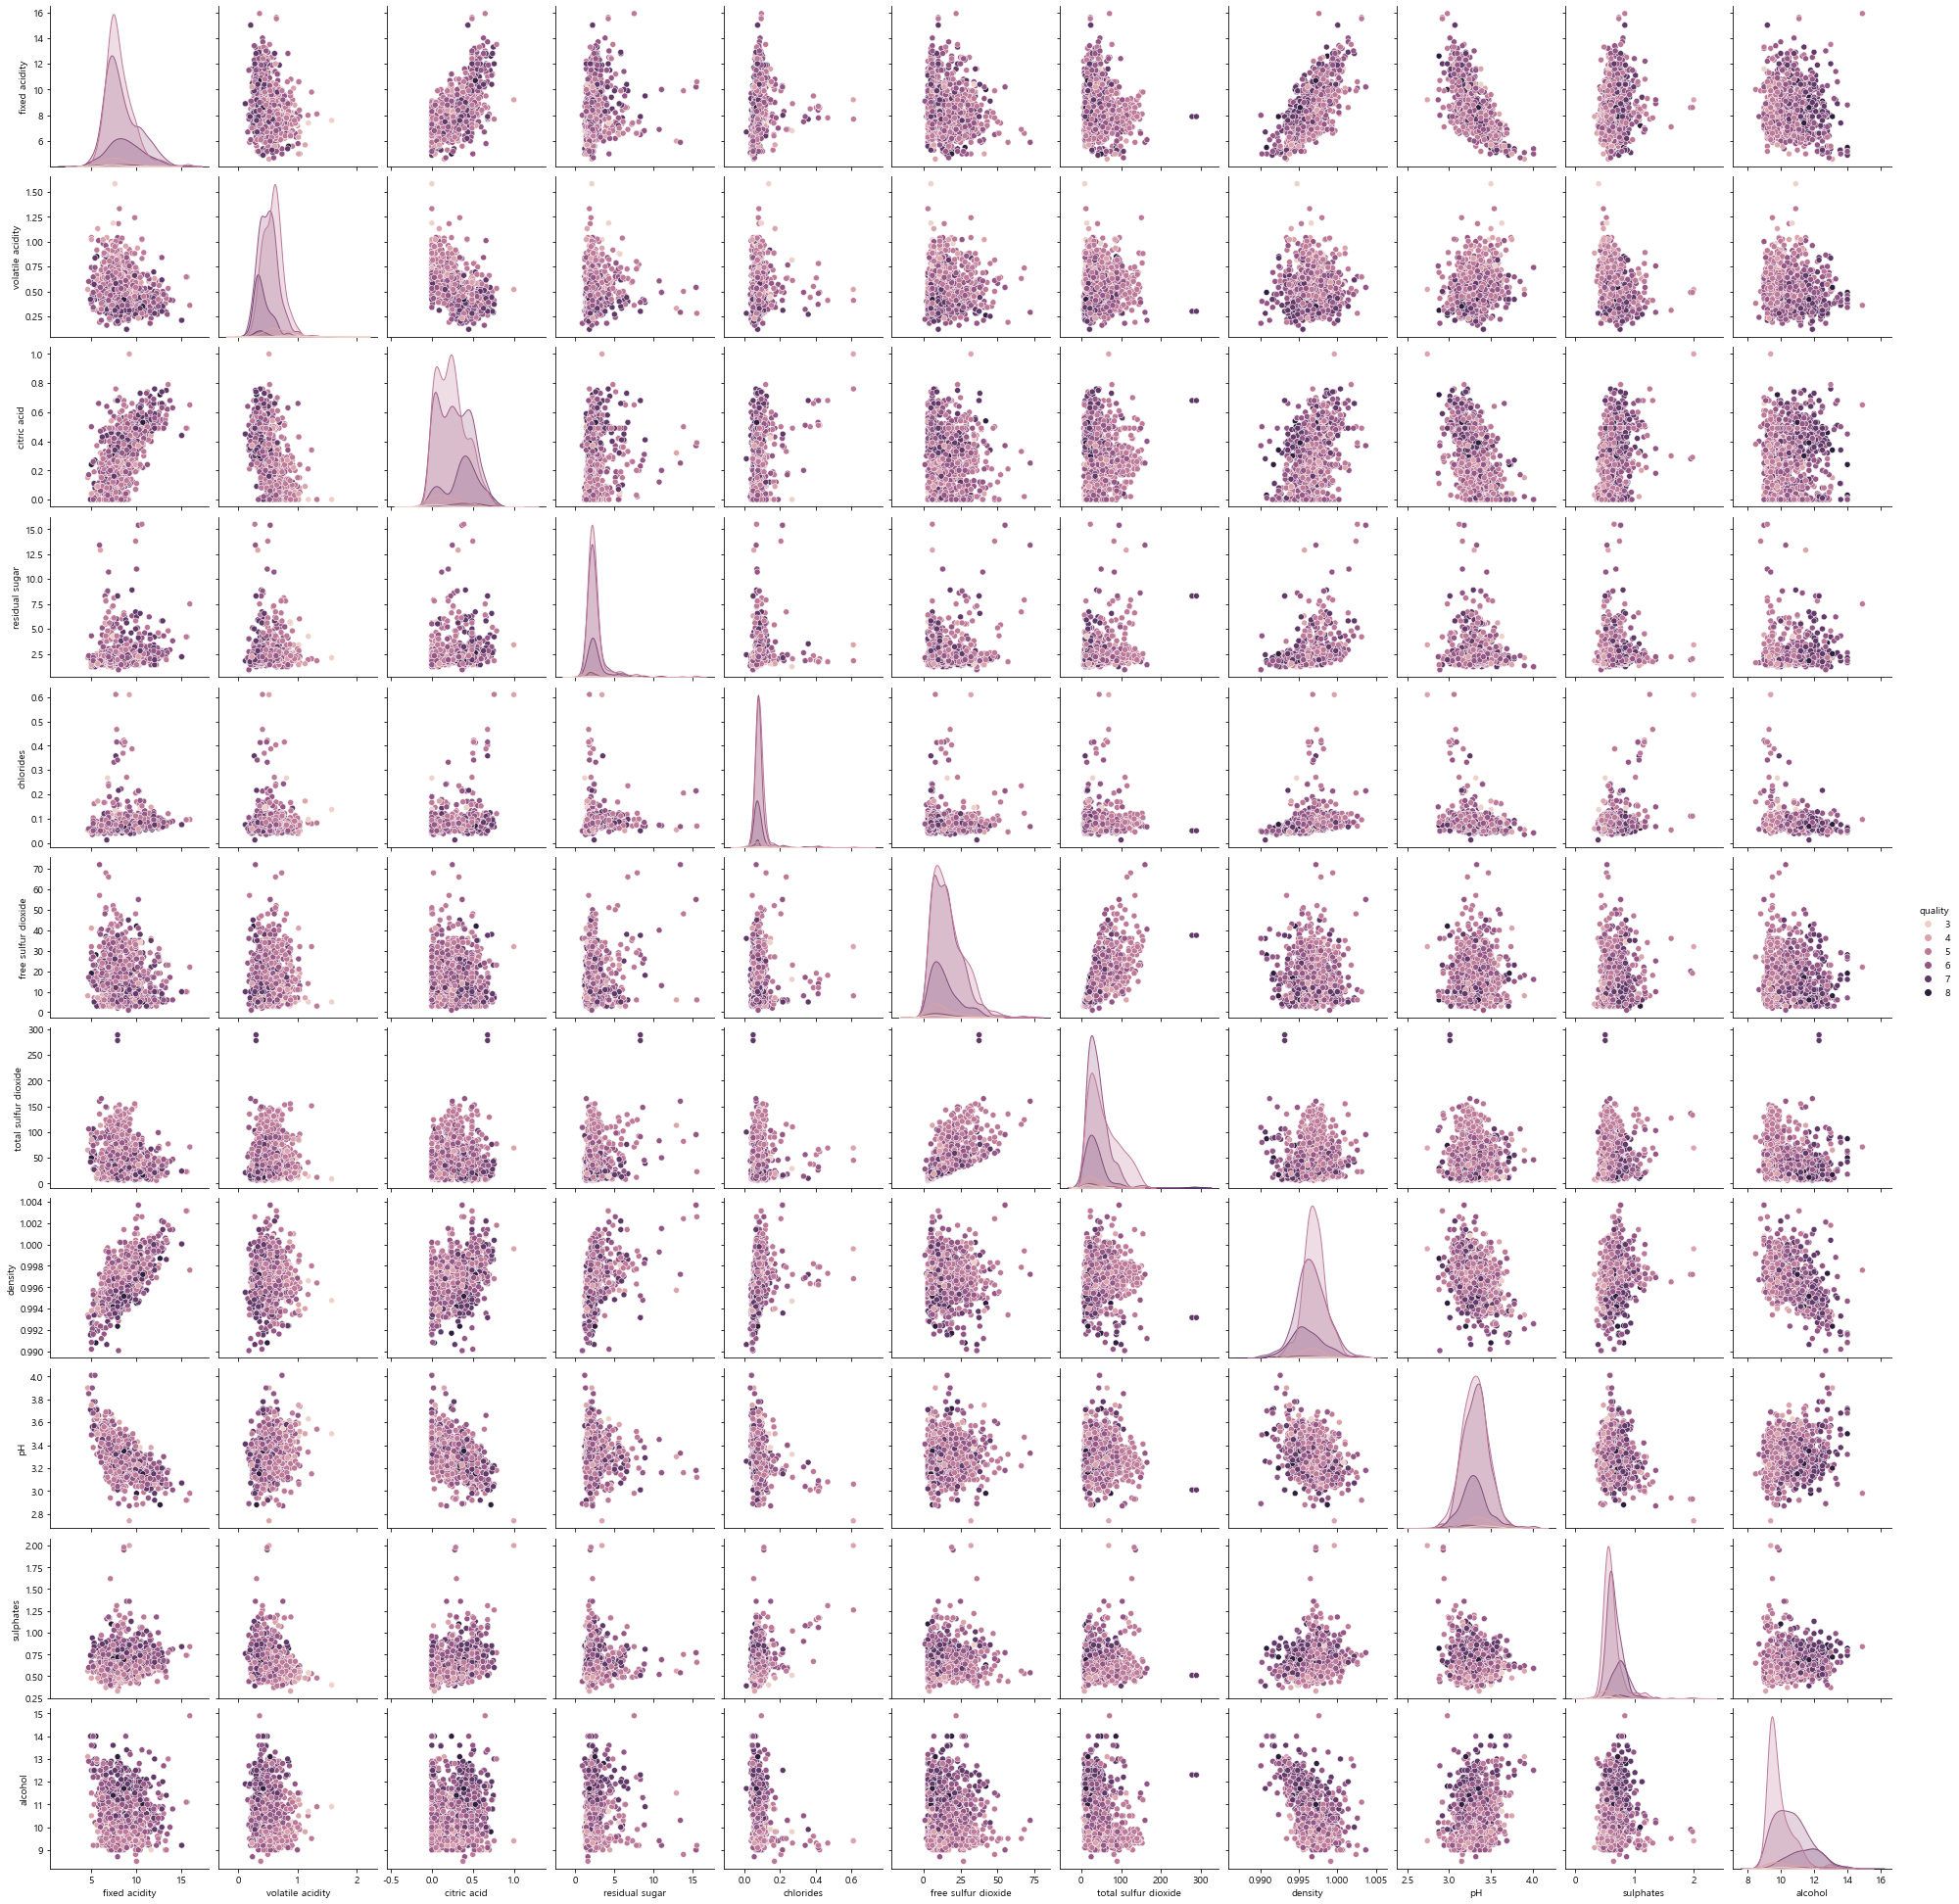

In [21]:
temp=pd.concat([X_train,Y_train],axis=1)
sns.pairplot(temp,hue='quality')

<AxesSubplot:>

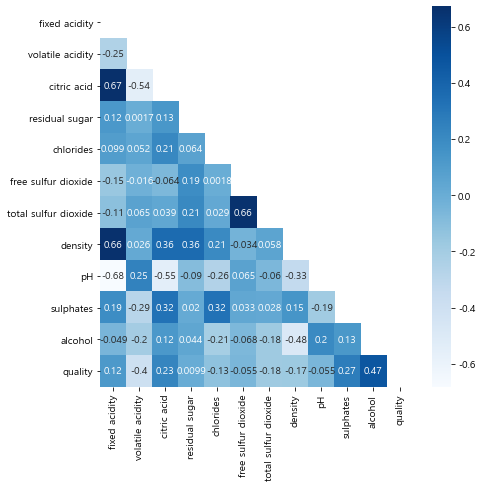

In [22]:
mask=np.zeros_like(temp.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(7,7))
sns.heatmap(temp.corr(),annot=True,mask=mask,cmap='Blues')

<li><strong>quality & volatile acidity</strong></li>
<li><strong>quality & alcohol</strong></li>
<li>alcohol & density</li>
<li>pH & fixed acidity</li>
<li>pH & citric acid</li>
<li>density & fixed acidity</li>
<li>total sulfur dioxide & free sulfur dioxide</li>
<li>citric acid & fixed acidity</li>
이 상관관계가 있다

<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>

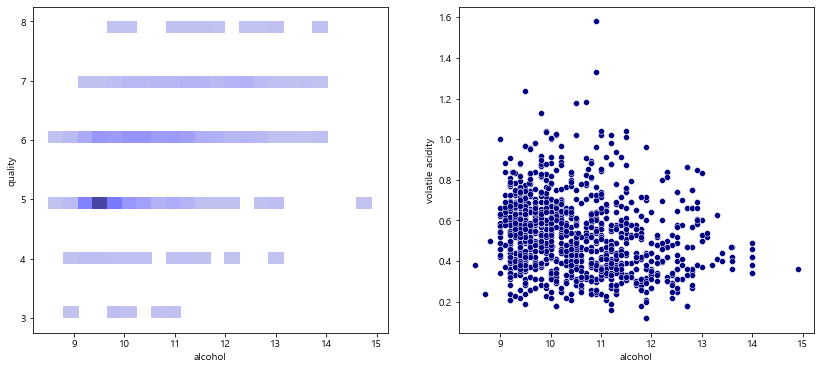

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.histplot(data=temp,x='alcohol',y='quality',color='navy')
plt.subplot(122)
sns.scatterplot(data=temp,x='alcohol',y='volatile acidity',color='navy')

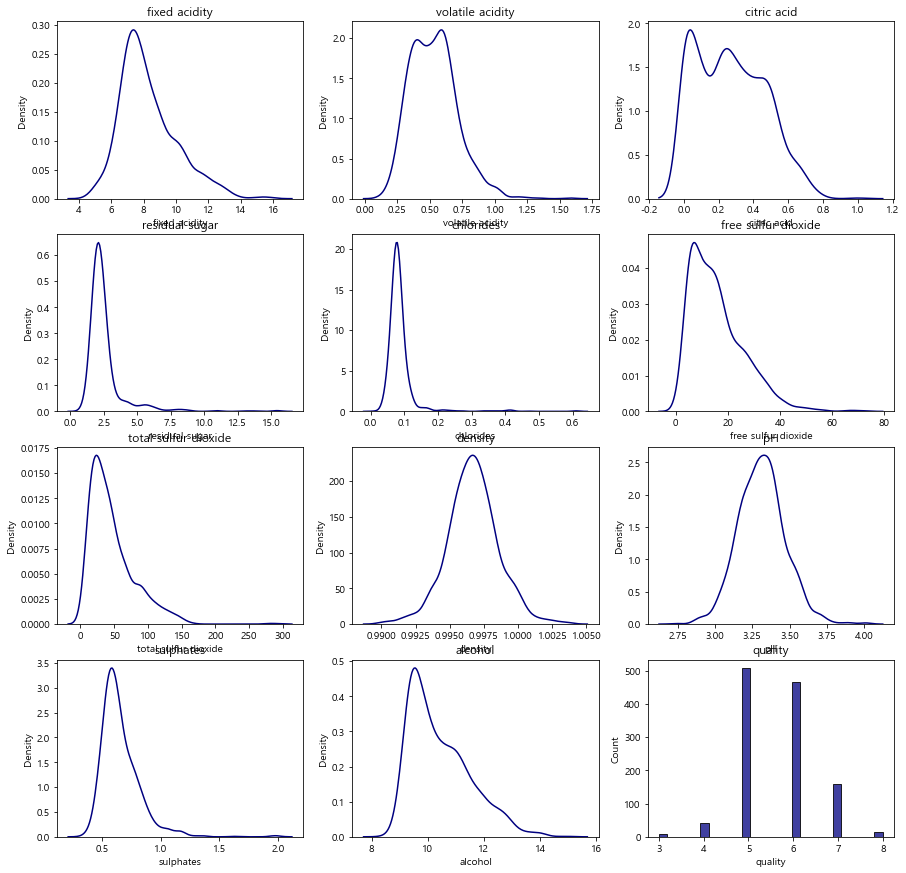

In [57]:
plt.figure(figsize=(15,15))
for i in range (0,len(temp.columns)):
    plt.subplot(4,3,i+1)
    plt.title('{0}'.format(temp.columns[i]))
    if i == 11 :
        sns.histplot(temp['{0}'.format(temp.columns[i])],color='navy')
    else:
        sns.kdeplot(temp['{0}'.format(temp.columns[i])],color='navy')

In [59]:
temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.282819,0.528603,0.268791,2.551793,0.086324,15.816514,46.756047,0.996696,3.313328,0.655847,10.438477,5.641368
std,1.756017,0.180525,0.195812,1.446071,0.045220,10.269151,33.426219,0.001890,0.157392,0.165055,1.077417,0.828231
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.500000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,23.000000,0.995550,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.405000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


free sulfur dioxide와 total sulfur dioxide는 outlier 갖고 있기 때문에 RobustScaler를 사용한다.<br>
분류 작업이기 때문에 StandardScaler를 사용한다.

## 3. Data 전처리

### 결측치 확인

In [61]:
X_train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [62]:
X_test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [63]:
rs=RobustScaler()
ss=StandardScaler()

### Feature Scaling - Robust Scaling

In [68]:
X_Robust_train=X_train.copy()
X_Robust_test=X_test.copy()
for i in range(0,len(X_train.columns)):
    X_Robust_train['{0}'.format(X_train.columns[i])]=rs.fit_transform(X_Robust_train['{0}'.format(X_train.columns[i])
                                                                                     ].to_frame(name=('{0}'.format(X_train.columns[i]))))
    X_Robust_test['{0}'.format(X_test.columns[i])]=rs.fit_transform(X_Robust_test['{0}'.format(X_test.columns[i])
                                                                                 ].to_frame(name=('{0}').format(X_test.columns[i])))

## 4. 모델 선택 및 훈련 - Logistic Regression

In [72]:
lr=LogisticRegression()

In [77]:
lr.fit(X_Robust_train,Y_train)

C:\Users\suyeo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
Robust_result=lr.predict(X_Robust_test)

In [81]:
accuracy_score(Y_test,Robust_result)

0.6025

## 4-1. 모델 선택 및 훈련 - Logistic Regression without Robust Scaling

In [82]:
lr.fit(X_train,Y_train)

C:\Users\suyeo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
result=lr.predict(X_test)

In [89]:
accuracy_score(Y_test,result)

0.59

Scaling을 한 것이 더 높은 것을 알 수 있다.

## 3-2. 데이터 전처리 - Standard Scaler

In [90]:
X_Standard_train=X_train.copy()
X_Standard_test=X_test.copy()
for i in range(0,len(X_train.columns)):
    X_Standard_train['{0}'.format(X_train.columns[i])]=ss.fit_transform(X_Standard_train['{0}'.format(X_train.columns[i])
                                                                                     ].to_frame(name=('{0}'.format(X_train.columns[i]))))
    X_Standard_test['{0}'.format(X_test.columns[i])]=ss.fit_transform(X_Standard_test['{0}'.format(X_test.columns[i])
                                                                                 ].to_frame(name=('{0}').format(X_test.columns[i])))

## 4-3. 모델 선택 및 훈련 - Logistic Regression with Standard Scaler 

In [91]:
lr.fit(X_Standard_train,Y_train)

LogisticRegression()

In [92]:
Standard_result=lr.predict(X_test)

In [94]:
accuracy_score(Y_test,Standard_result)

0.4175

outlier가 존재하여 StandardScaler의 성능이 떨어짐을 알수있다.

## 4-4. 모델 선택 및 훈련 - Perceptron with Robust Scaler

In [96]:
pt=Perceptron()

In [98]:
pt.fit(X_Robust_train,Y_train)

Perceptron()

In [99]:
pt_result=pt.predict(X_Robust_test)

In [100]:
accuracy_score(Y_test,pt_result)

0.43

## 4-5. 모델 선택 및 훈련 - Perceptron with Standard Scaler

In [106]:
pt.fit(X_Standard_train,Y_train)

Perceptron()

In [107]:
pt_s_result=pt.predict(X_Standard_test)

In [108]:
accuracy_score(Y_test,pt_result)

0.43

## 4-6. 모델 선택 및 훈련 - DecisionTreeClassifier without Scaler

In [105]:
dtc=DecisionTreeClassifier()

In [109]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [110]:
dtc_result=dtc.predict(X_test)

In [111]:
accuracy_score(Y_test,dtc_result)

0.63

## 4-7. 모델 선택 및 훈련 - LightGBM without scaling

LightGBM은 Tree 모델이라 scaling이 필요없다.

In [113]:
lgb=LGBMClassifier()

In [114]:
lgb.fit(X_train,Y_train)

LGBMClassifier()

In [117]:
lgb_result=lgb.predict(X_test)

In [118]:
accuracy_score(Y_test,lgb_result)

0.7075